<a href="https://colab.research.google.com/github/p1kalys/Basics/blob/main/my_wish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")
df = pd.read_excel("/content/dataset_DN.xlsx")
df.head()


,ID,Age,Gender,BU,SCr,HbA1c,Class,eGFR,Stages
0,1,50,male,30.71,1.02,6.90,non-DN,99.586405,Stage I
1,2,62,male,31.01,1.26,6.60,DN,74.702037,Stage II
2,3,65,female,27.11,0.81,7.50,non-DN,75.422987,Stage II
3,4,74,male,26.51,6.98,8.50,DN,9.994300,Stage V
4,5,40,male,39.88,1.16,10.56,non-DN,89.828235,Stage II


In [61]:
df.insert(5,"level",value=True)

In [62]:
for i in range(0,len(df['eGFR'])):
  if df.eGFR[i]>90:
    df.level[i]=1
  elif df.eGFR[i]>=60 and df.eGFR[i]<=90 :
    df.level[i]=2
  elif df.eGFR[i]>=30 and df.eGFR[i]<60 :
    df.level[i]=3
  elif df.eGFR[i]>=15 and df.eGFR[i]<30 :
    df.level[i]=4
  elif df.eGFR[i]<15:
    df.level[i]=5
df['level']=df['level'].astype(int)

In [63]:
#Replace categorical values with numbers
df['Gender'].value_counts()
categories = {"male":0, "female":1}
df['Gender']=df['Gender'].factorize()[0].astype('float')
df['Gender'] = df['Gender'].replace(categories)
df['Class'].value_counts()

categories = {"DN":0, "non-DN":1}
df['Class']=df['Class'].factorize()[0].astype(float)
df['Class'] = df['Class'].replace(categories)

In [64]:

#Replace categorical values with numbers
df.describe()
df.info() 
df['ID'].fillna(df['ID'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].median(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['BU'].fillna(df['BU'].median(), inplace=True)
df['SCr'].fillna(df['SCr'].median(), inplace=True)
df['HbA1c'].fillna(df['HbA1c'].median(), inplace=True)
df['Class'].fillna(df['Class'].median(), inplace=True)
df['eGFR'].fillna(df['eGFR'].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    float64
 3   BU      508 non-null    float64
 4   SCr     519 non-null    float64
 5   level   519 non-null    int64  
 6   HbA1c   504 non-null    float64
 7   Class   519 non-null    float64
 8   eGFR    519 non-null    float64
 9   Stages  519 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 40.7+ KB


In [65]:
df.head()

,ID,Age,Gender,BU,SCr,level,HbA1c,Class,eGFR,Stages
0,1,50,0.0,30.71,1.02,1,6.90,0.0,99.586405,Stage I
1,2,62,0.0,31.01,1.26,2,6.60,1.0,74.702037,Stage II
2,3,65,1.0,27.11,0.81,2,7.50,0.0,75.422987,Stage II
3,4,74,0.0,26.51,6.98,5,8.50,1.0,9.994300,Stage V
4,5,40,0.0,39.88,1.16,2,10.56,0.0,89.828235,Stage II


ID        0
Age       0
Gender    0
BU        0
SCr       0
level     0
HbA1c     0
Class     0
eGFR      0
Stages    0
dtype: int64
53.37030828516378
6.866743737957611
69.50957661402123
ID        0
Age       0
Gender    0
BU        0
SCr       0
level     0
HbA1c     0
Class     0
eGFR      0
Stages    0
dtype: int64
ID          int64
Age         int64
Gender    float64
BU        float64
SCr       float64
level       int64
HbA1c     float64
Class     float64
eGFR      float64
Stages     object
dtype: object


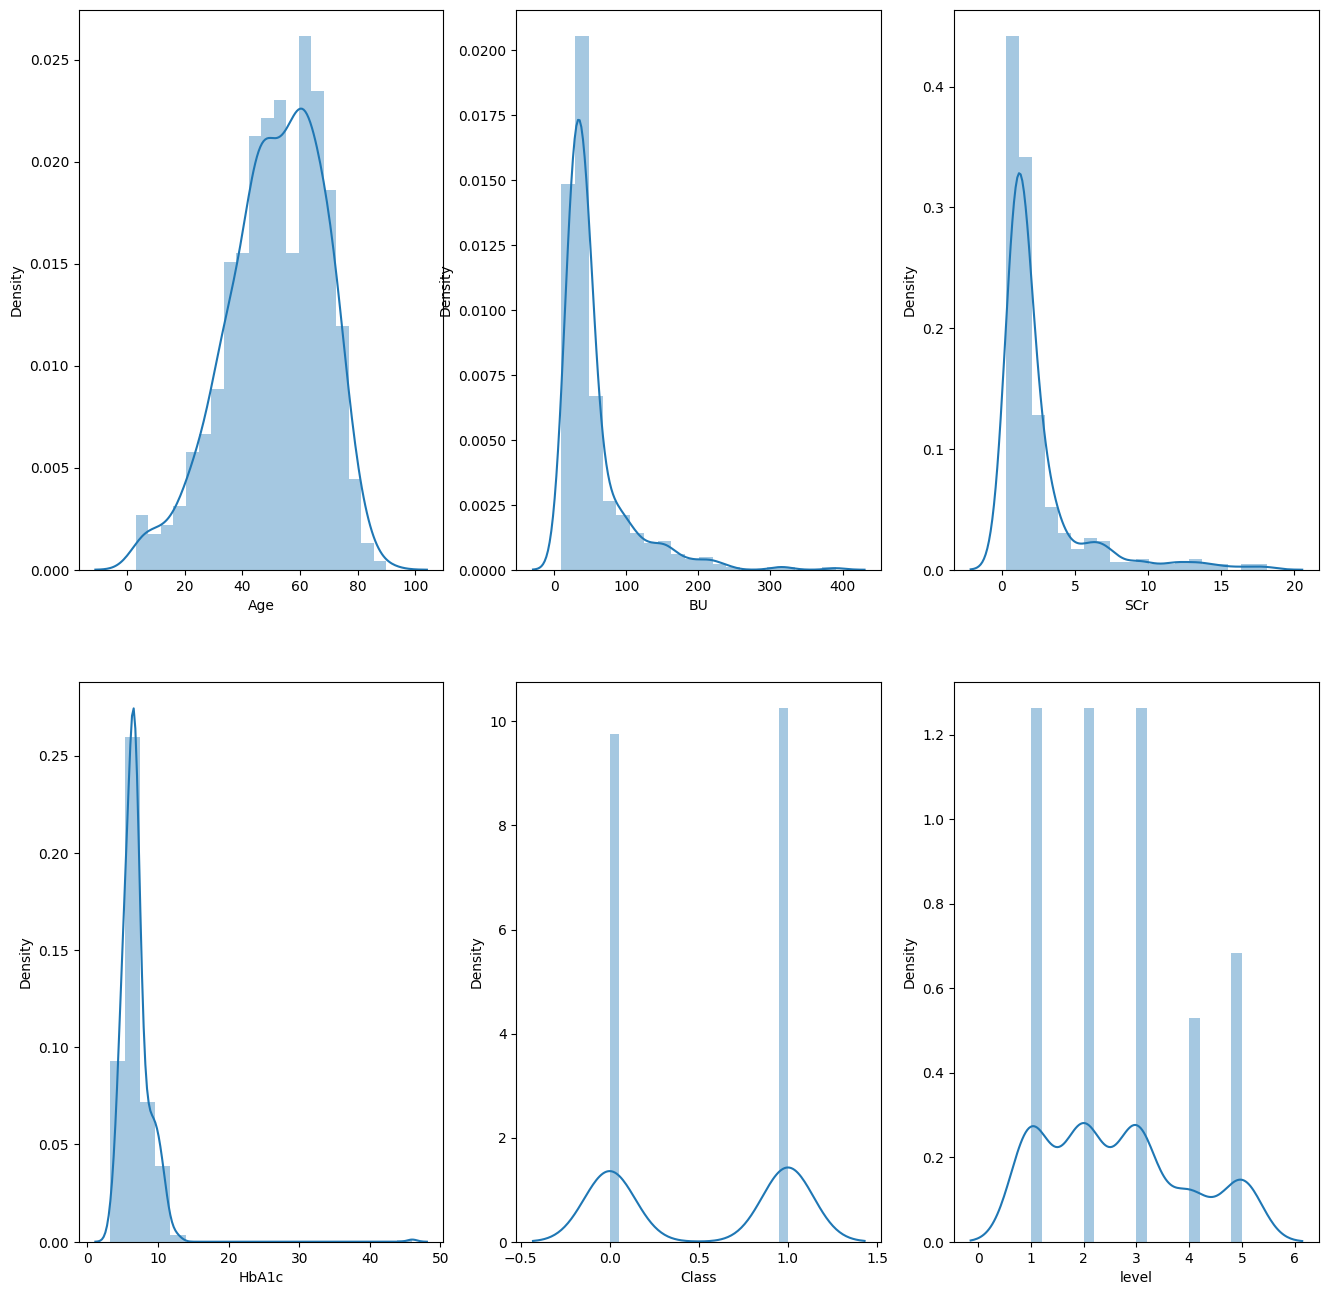

In [75]:
fig, ax = plt.subplots(2,3, figsize=(16,16))

sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.BU, bins = 20, ax=ax[0,1]) 
sns.distplot(df.SCr, bins = 20, ax=ax[0,2]) 
sns.distplot(df.HbA1c, bins = 20, ax=ax[1,0])
sns.distplot(df.Class, bins = 20, ax=ax[1,1]) 
sns.distplot(df.level, bins = 20, ax=ax[1,2]) 





df.describe()
df_copy = df.copy(deep=True)
df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']] = df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']].replace(0,np.NaN)

print(df.isnull().sum())
#df = df.dropna()

print(df['BU'].mean())
df['BU'] = df['BU'].fillna(53.68)
print(df['HbA1c'].mean())
df['HbA1c'] = df['HbA1c'].fillna(6.87)
print(df['eGFR'].mean())
df['eGFR'] = df['eGFR'].fillna(69.50)

print(df.isnull().sum())

#Rename Dataset to Label to make it easy to understand

print(df.dtypes)

In [76]:
## Import data visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: ignored

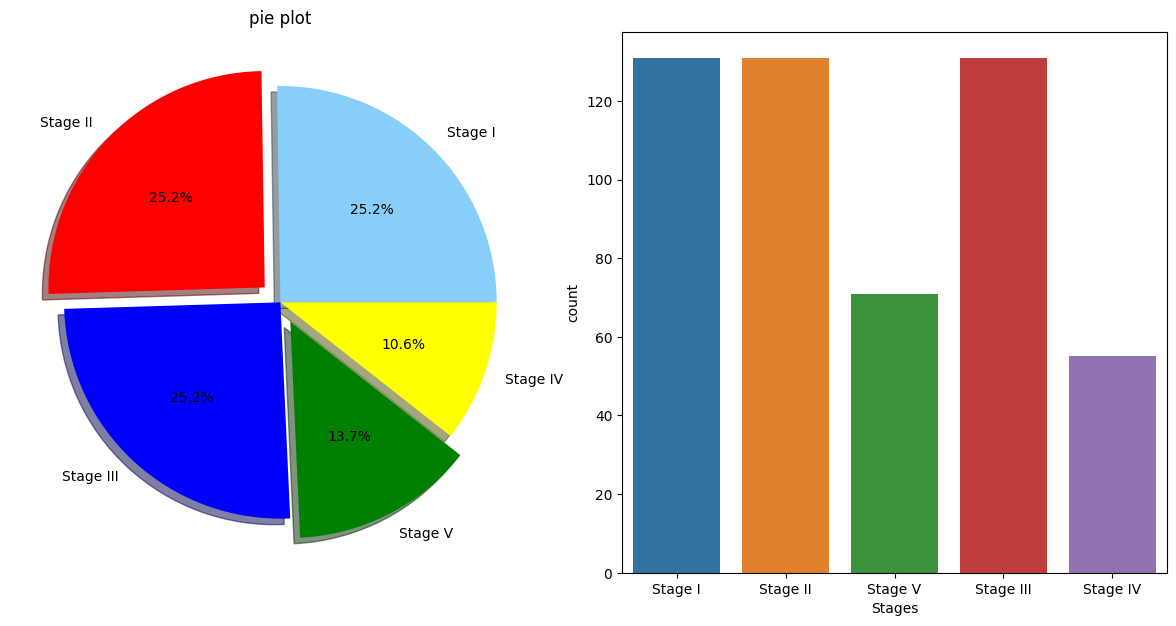

In [114]:

f,ax=plt.subplots(1,2,figsize=(12,6))
colors = ['lightskyblue', 'red', 'blue', 'green', 'yellow']
df['Stages'].value_counts().plot.pie(explode=[0,0.1,0,0.1,0],colors=colors,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('pie plot')
ax[0].set_ylabel('')
 
plt.tight_layout() 
sns.countplot(x="Stages", data=df)
sns.countplot(x="Stages", hue="Stages", data=df,colors=colors,autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Bar Graph')

plt.show()

In [10]:

df.corr()

,ID,Age,Gender,BU,SCr,level,HbA1c,Class,eGFR
ID,1.000000,-0.104242,0.017006,-0.074275,-0.066571,-0.121719,-0.229730,-0.142343,0.234639
Age,-0.104242,1.000000,0.001133,0.141751,0.110261,0.325296,0.161975,0.242874,-0.398373
Gender,0.017006,0.001133,1.000000,0.009745,-0.035072,0.197568,-0.057373,-0.034456,-0.222527
BU,-0.074275,0.141751,0.009745,1.000000,0.761338,0.668518,0.458463,0.537558,-0.487744
SCr,-0.066571,0.110261,-0.035072,0.761338,1.000000,0.736918,0.399499,0.480510,-0.529085
level,-0.121719,0.325296,0.197568,0.668518,0.736918,1.000000,0.377307,0.722246,-0.798081
HbA1c,-0.229730,0.161975,-0.057373,0.458463,0.399499,0.377307,1.000000,0.377840,-0.346462
Class,-0.142343,0.242874,-0.034456,0.537558,0.480510,0.722246,0.377840,1.000000,-0.644426
eGFR,0.234639,-0.398373,-0.222527,-0.487744,-0.529085,-0.798081,-0.346462,-0.644426,1.000000


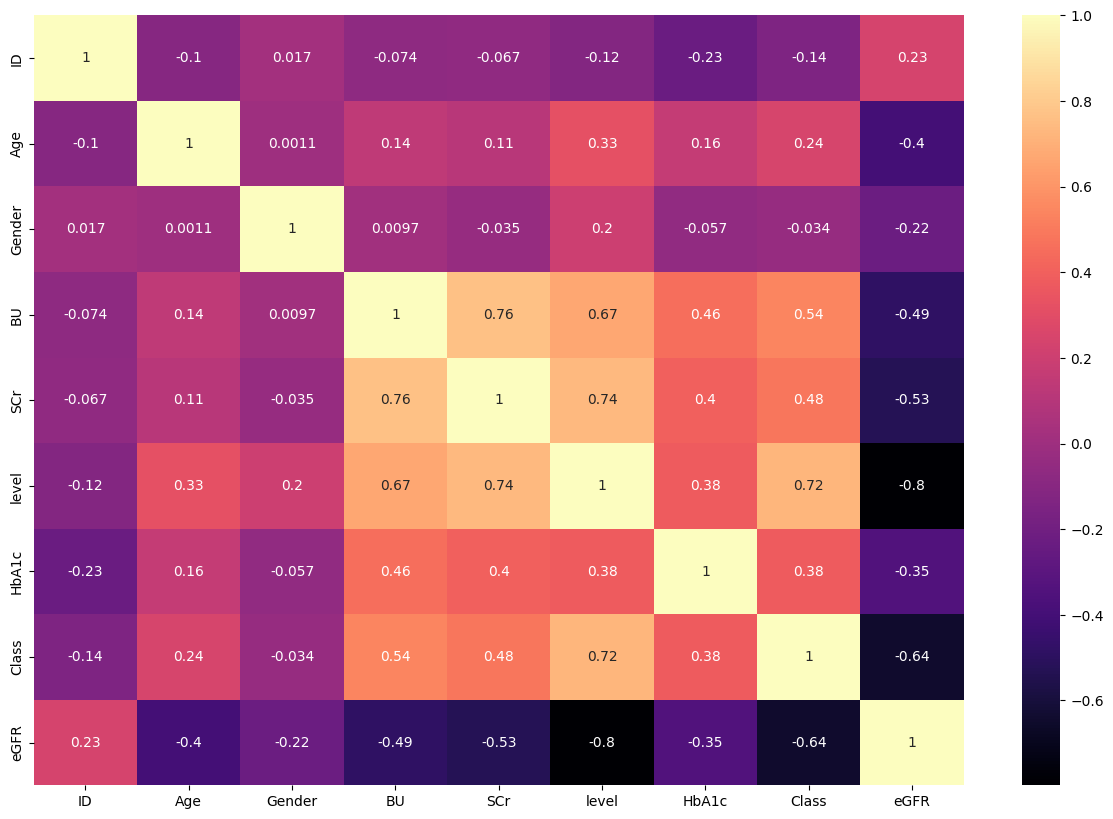

In [11]:

f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, cmap = "magma" )

plt.show()

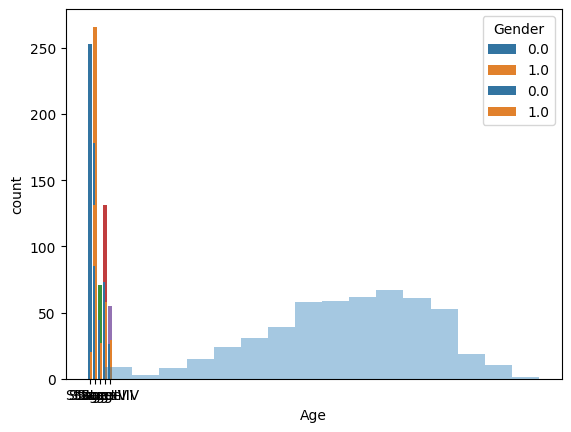

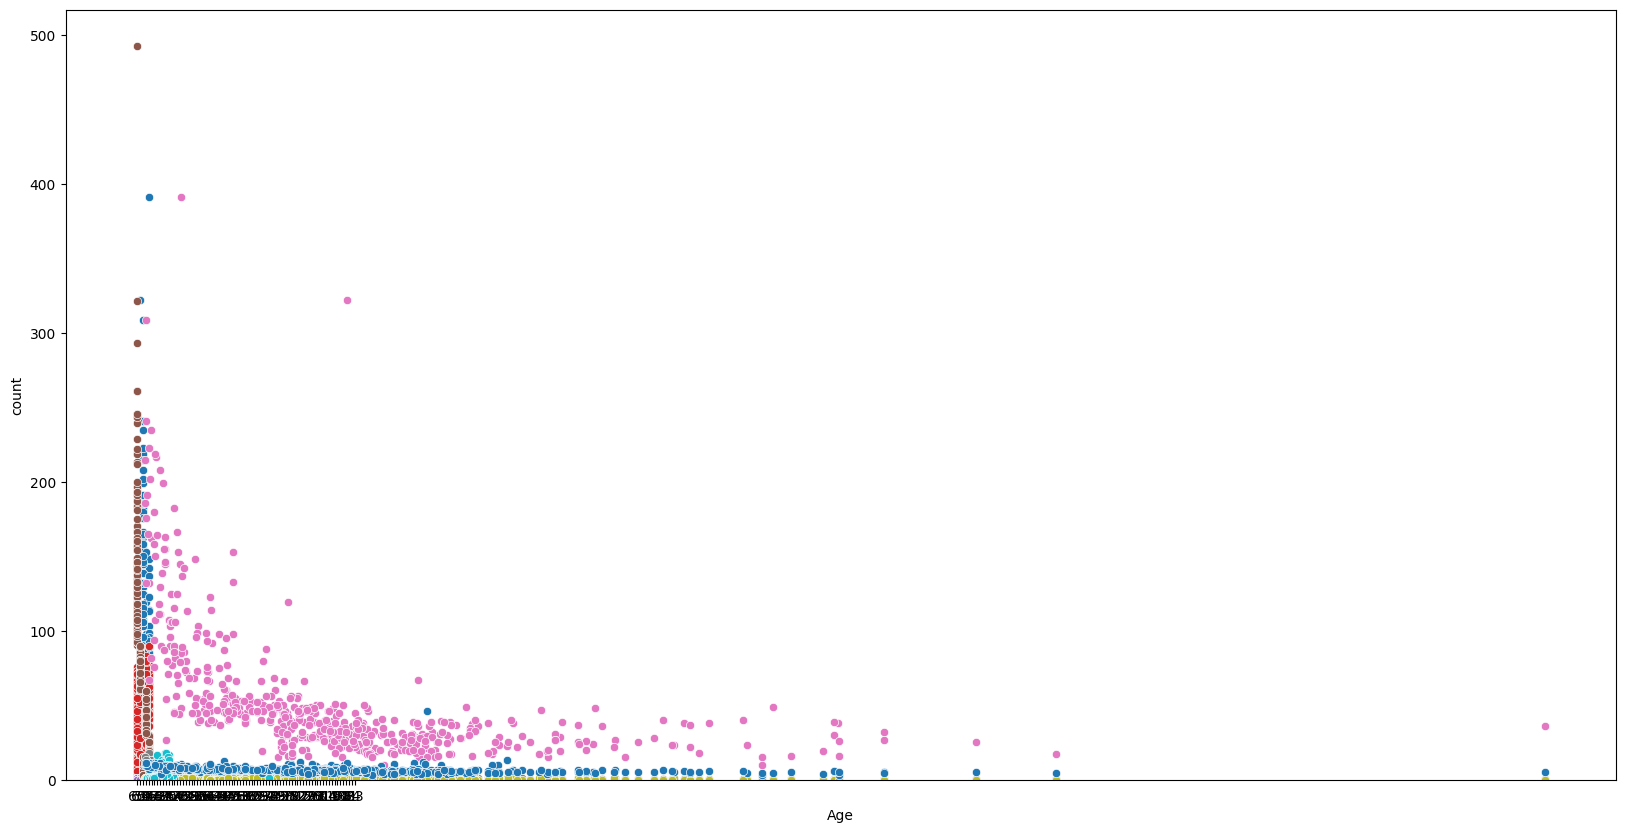

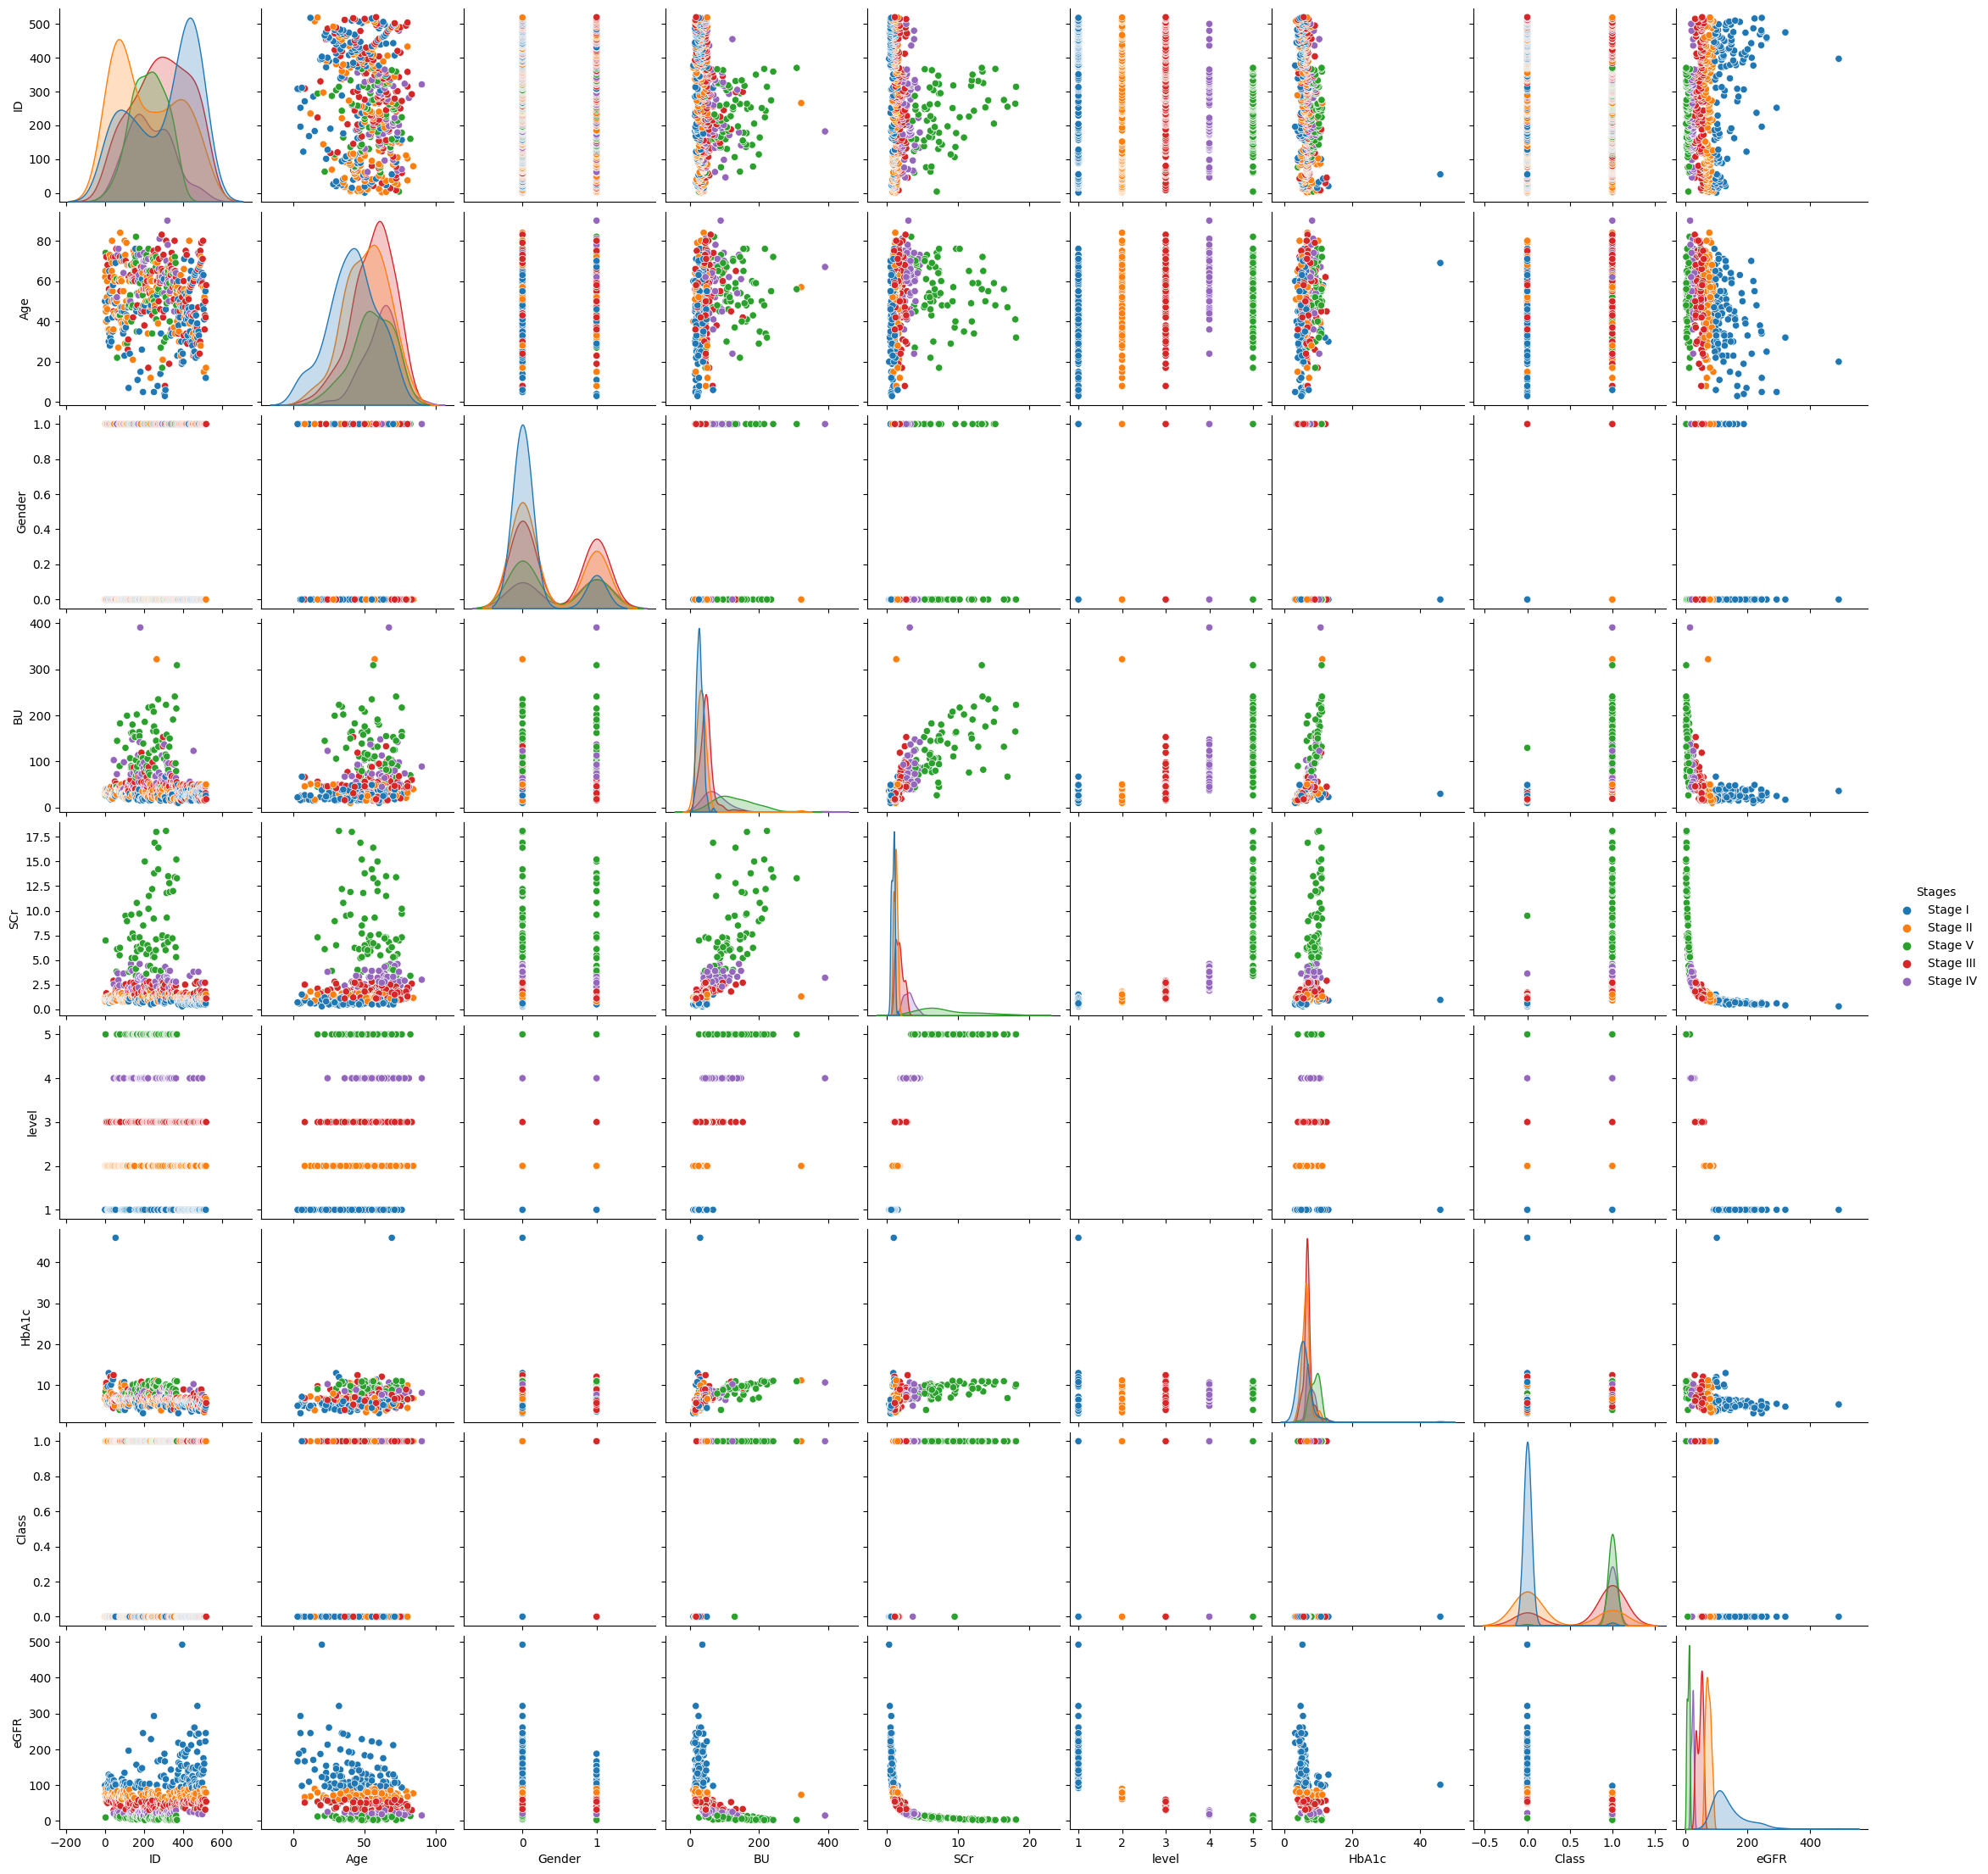

In [22]:
df.corr()
#Understand the data - # Value 1 = Liver disease and 2 is no disease
sns.countplot(x="Class", data=df)
sns.countplot(x="Class", hue="Gender", data=df)
sns.countplot(x="Stages", data=df)
sns.countplot(x="Stages", hue="Gender", data=df)
sns.distplot(df['Age'], kde=False)

plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)


sns.scatterplot(x="Stages", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Stages", y="HbA1c", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Stages", y="SCr", data=df) 
sns.scatterplot(x="Stages", y="Age", data=df) 
sns.scatterplot(x="Stages", y="Gender", data=df)
sns.scatterplot(x="Stages", y="eGFR", data=df) 
sns.scatterplot(x="eGFR", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="eGFR", y="SCr", data=df)
sns.scatterplot(x="eGFR", y="Gender", data=df)
sns.scatterplot(x="HbA1c", y="SCr", data=df) 
sns.scatterplot(y="HbA1c", x="eGFR", data=df)
sns.pairplot(df, hue='Stages')

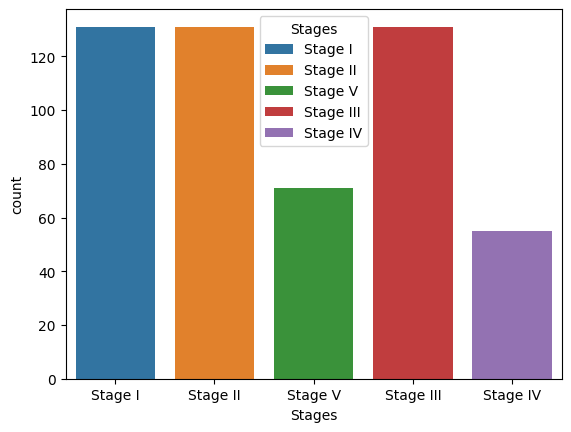

In [86]:

sns.countplot(x="Stages", data=df)
sns.countplot(x="Stages", hue="Stages", data=df)




<Axes: xlabel='Stages', ylabel='count'>

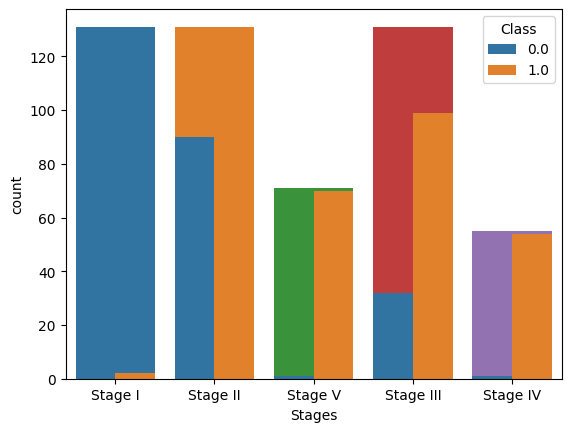

In [84]:

sns.countplot(x="Stages", data=df)
sns.countplot(x="Stages", hue="Class", data=df)

<Axes: xlabel='Class', ylabel='count'>

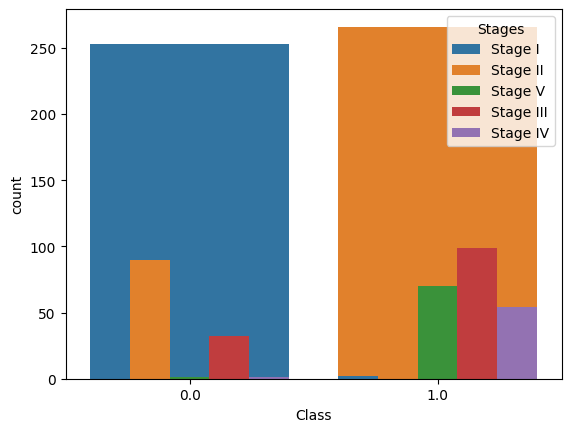

In [85]:

sns.countplot(x="Class", data=df)
sns.countplot(x="Class", hue="Stages", data=df)

<Axes: >

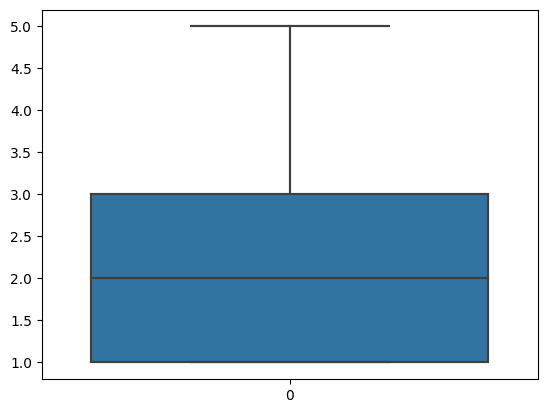

In [87]:
sns.boxplot(df["level"])
sns.boxplot(df["level"],orient='v')

Text(0.5, 1.0, 'multistages')

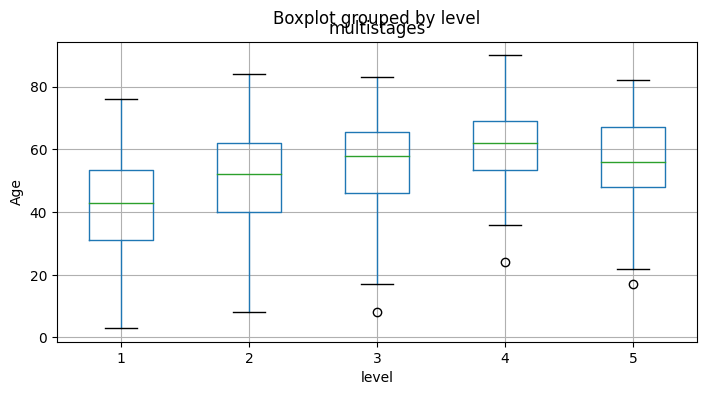

In [98]:
ax=df.boxplot(column="Age",by="level",figsize=(8,4))
ax.set_ylabel("Age")
ax.set_title("multistages")

In [11]:

#Define the dependent variable that needs to be predicted (labels)
Y = df["level"].values
df.info()
df["level"]
#Encode labels
#This is required by scikit learn when dealing with categorical data.

#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(Y)
y=label_encoder.transform(Y)
classes=label_encoder.classes_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    float64
 3   BU      519 non-null    float64
 4   SCr     519 non-null    float64
 5   level   519 non-null    int64  
 6   HbA1c   519 non-null    float64
 7   Class   519 non-null    float64
 8   eGFR    519 non-null    float64
 9   Stages  519 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 40.7+ KB


In [12]:
X = df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']]
y = df['level']
cols = X.columns
index = X.index
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']], df['level'], test_size=0.20, random_state=0)
     
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [13]:
#Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        27
           3       1.00      0.93      0.96        29
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        14

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



In [15]:
ID=input("ID")
Age=input("age")
Gender=input("Gender")
BU=input("Blood urea")
SCr=input("Serum Creatinine")
HbA1C=input("Blood sugar")
Class=input("Class")
eGFR=input("eGFR")
prediction = RF.predict([[ID, Age,Gender, BU, SCr,HbA1C,Class,eGFR]])
prediction

ID1
age20
Gender1
Blood urea30
Serum Creatinine1.3
Blood sugar6
Class1
eGFR85


array([2])

In [16]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
  

In [18]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()



df_model

,Accuracy
Logistic Regression,0.817308
Support Vector Machines,0.644231
Decision Trees,0.990385
Random Forest,0.980769
Naive Bayes,0.951923
K-Nearest Neighbor,0.778846


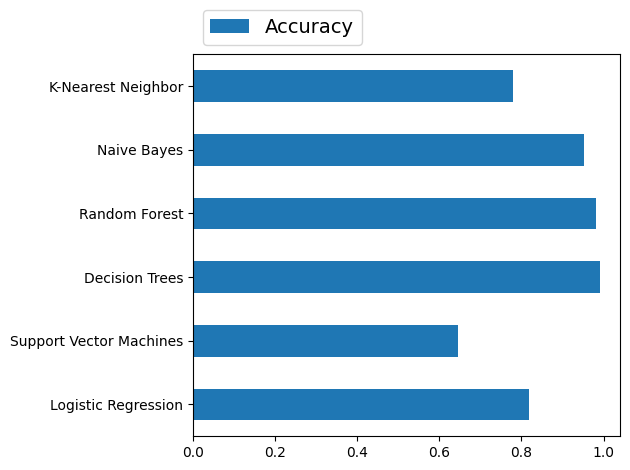

In [19]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

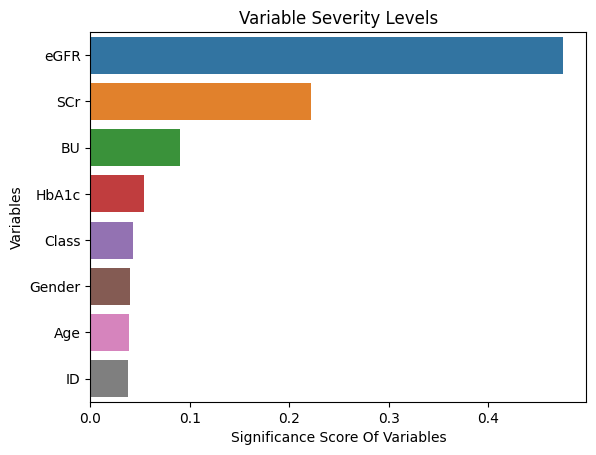

In [20]:
from sklearn.ensemble import RandomForestClassifier
     

model = RandomForestClassifier()
model.fit(X_train,y_train)

cross_val_score(model, X, y, cv = 10).mean()

feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


In [21]:
y_pred = model.predict(X_test)
y_pred


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_auc_score
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        27
           3       1.00      0.93      0.96        29
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        14

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#create fake dataset
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

In [25]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

NameError: ignored

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

ValueError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{1: 1.0, 2: 1.0, 3: 0.987012987012987, 4: 0.9333333333333333, 5: 1.0}

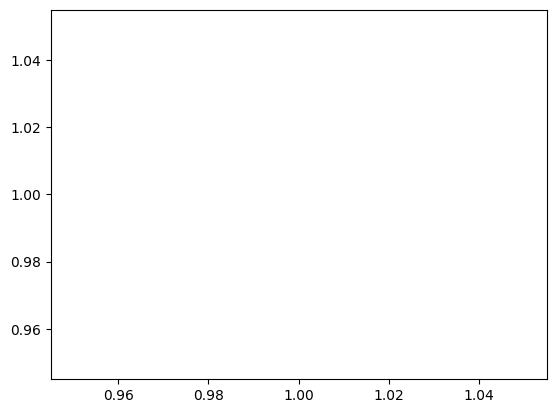

In [ ]:
plt.plot(roc_auc_dict[1], roc_auc_dict[2])
plt.show()

In [ ]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [ ]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [ ]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
#Multiclass classification evaluation with KS test
#Creating a synthetic dataset
scale = 3.5
size = 500

In [ ]:

class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

In [ ]:
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

In [ ]:
class3_x = np.random.normal(loc = 10, scale = scale, size = size)
class3_y = np.random.normal(loc = 10, scale = scale, size = size)

In [ ]:
class4_x = np.random.normal(loc = 10, scale = scale, size = size)
class4_y = np.random.normal(loc = 10, scale = scale, size = size)
     

In [ ]:

class5_x = np.random.normal(loc = 10, scale = scale, size = size)
class5_y = np.random.normal(loc = 10, scale = scale, size = size)


In [ ]:
df_class1 = pd.DataFrame({'x' : class1_x, 'y' : class1_y, 'Stages': 1})
df_class2 = pd.DataFrame({'x' : class2_x, 'y' : class2_y, 'Stages': 2})
df_class3 = pd.DataFrame({'x' : class3_x, 'y' : class3_y, 'Stages': 3})
df_class4 = pd.DataFrame({'x' : class4_x, 'y' : class4_y, 'Stages': 4})
df_class5 = pd.DataFrame({'x' : class5_x, 'y' : class5_y, 'Stages': 5})
#df = df_class1.append(df_class2,ignore_index = True)
#df = df.append(df_class3, ignore_index = True)
df = df_class3.append(df_class4, ignore_index = True)
df = df.append(df_class5, ignore_index = True)
     

In [ ]:
df_class1.info()
df_class2.info()
df_class3.info()
df_class4.info()
df_class5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   Stages  500 non-null    int64  
dtypes: float64(2), int64(1)
me

<Axes: xlabel='x', ylabel='y'>

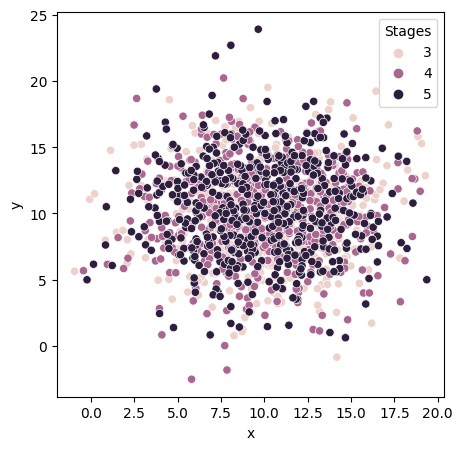

In [ ]:
# Plot them to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'x', y = 'y', hue = 'Stages', data = df)

In [ ]:
X = df[['x', 'y']]
y = df['Stages']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:

#Fits the model and make the predictions
model_multiclass = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
model_multiclass.fit(X_train, y_train)
     

RandomForestClassifier(n_estimators=50)

In [ ]:

y_pred = model_multiclass.predict(X_test)
y_proba = model_multiclass.predict_proba(X_test)

In [ ]:
classes = model_multiclass.classes_
classes

array([3, 4, 5])

In [ ]:
from sklearn import metrics

ValueError: ignored

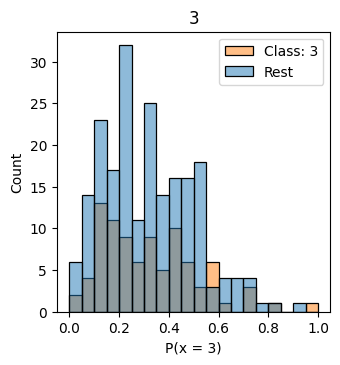

In [ ]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    auc=metrics.roc_auc_score(y_test,y_proba)
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom, label="AUC="+str(AUC))
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [ ]:
roc_auc_score(y_test,y_proba, multi_class="ovr")

0.5091417668453804

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 2, random_state = 4)

# Train the model on training data
model_RF.fit(X_train, y_train)

 
prediction_test_RF = model_RF.predict(X_test)


from sklearn.metrics import roc_curve, auc


RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_test_RF)
auc_RF = auc(RF_fpr, RF_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(RF_fpr, RF_tpr, marker='.', label='RandomForest (auc = %0.3f)' % auc_RF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


ValueError: ignored